## Business Case:
   
To what extent does a platform’s acquisition channel influence the learning outcomes of our students?
Are there any geographical locations where most of our students discover the platform, specifically through social media platforms like YouTube or Facebook?

We are working with real-world customer data to perform market segmentation—crucial for businesses to understand customer behavior and improve marketing efficiency. 

The project will involve 
- data preprocessing, 
- exploratory data analysis (EDA), 
- feature engineering, 
- implementation of clustering algorithms: k-means and hierarchical clustering, 
- Interpretation of results.

We will delve into the diversity of customer behavior and identify distinct segments that could be targeted with personalized marketing strategies.
    

### Importing the pre-requisites and libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('/Users/tasneem.kapadia/Downloads/project-files-customer-segmentation-in-marketing-with-python/customer_segmentation_data.csv')

In [3]:
data.head()

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4


### The Data:

The dataset consists of student information of over 3,800 individuals from the 365 program. The data has been preprocessed and in addition, the volume of the dataset has been restricted and anonymised to protect the privacy of the customers. 
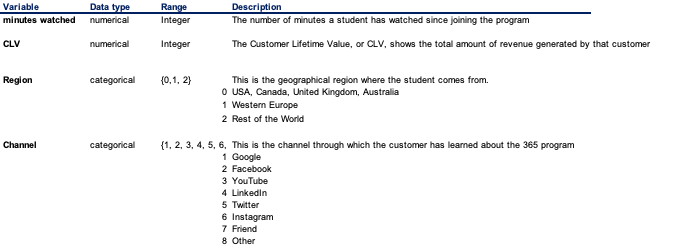

### EDA

Can information about the acquisition channel give us information about how much students will learn? For example, are X ( or Twitter) groups more or less likely to study than those from Instagram? Or are students from the US more likely to have heard about us through friends or social media?


With this analysis, our goal is to understand if there is a relationship between different groups of customers based on information we have about them. Moreover, this analysis will help group all existing members and give us insights into trends, such as overall groups from different sources. This can inform the marketing team and provide insights into where to invest more resources during marketing campaigns.

### Data Loading and Exploration: 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3834 entries, 0 to 3833
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   minutes_watched  3725 non-null   float64
 1   CLV              3834 non-null   float64
 2   region           3834 non-null   int64  
 3   channel          3834 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 119.9 KB


In [5]:
print (data.isna().sum())

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64


## Revenue Generation
### Revenue generated by Region:

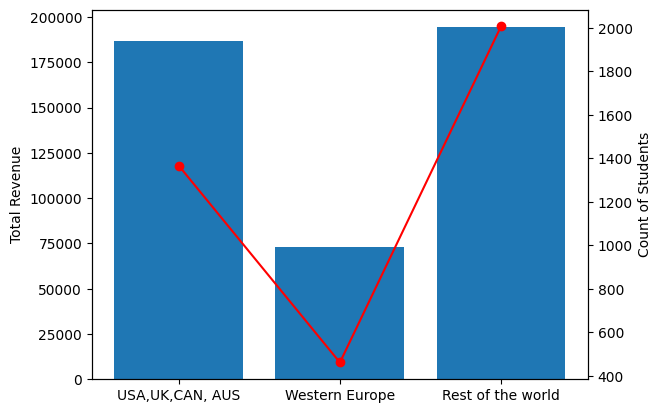

In [6]:
plt.bar( x=data.groupby('region').size().index,height=data.groupby('region')['CLV'].sum())
plt.xticks(ticks=[0,1,2], labels=['USA,UK,CAN, AUS', 'Western Europe', 'Rest of the world']);
plt.ylabel('Total Revenue')

plt.twinx()
plt.plot(data.groupby('region').size(), 'o-', color='red')
plt.ylabel('Count of Students');

#sns.barplot(data=data, x='region', y='CLV')

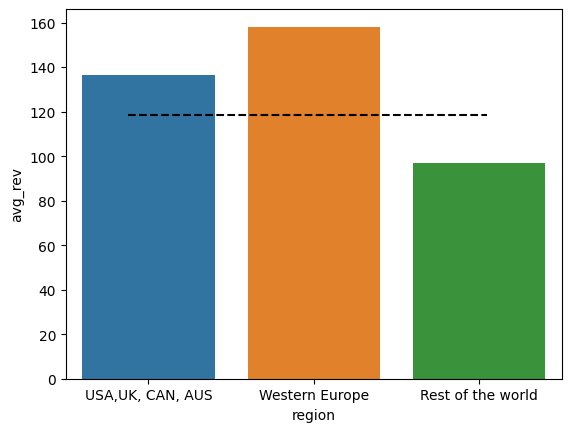

In [7]:
revenue_analysis_by_region= data.groupby('region')['CLV'].agg(['sum', 'count', 'mean'])
revenue_analysis_by_region['avg_rev']=revenue_analysis_by_region['sum']/revenue_analysis_by_region['count']
sns.barplot(y=revenue_analysis_by_region.avg_rev, x=revenue_analysis_by_region.index)
plt.axhline(y=data['CLV'].mean(),xmin=0.125, xmax=.85 , color='black', linestyle='--')

plt.xticks(ticks=[0,1,2], labels=['USA,UK, CAN, AUS', 'Western Europe', 'Rest of the world']);

### Inference:

Despite the Total Revenue of USA, UK, Australia and the Rest of the World being higher than Western Europe, the average CLV value of Western Europe is higher. This would mean that there are fewer customers in Europe who end up buying more products, and would be a good marketing avenue to boost revenue. 

The 'Rest of the world' bucket had the highest revenue and the highest number of customers as well, leading to a below average CLV value (average CLV is 118) 

### Revenue generated by Channel:

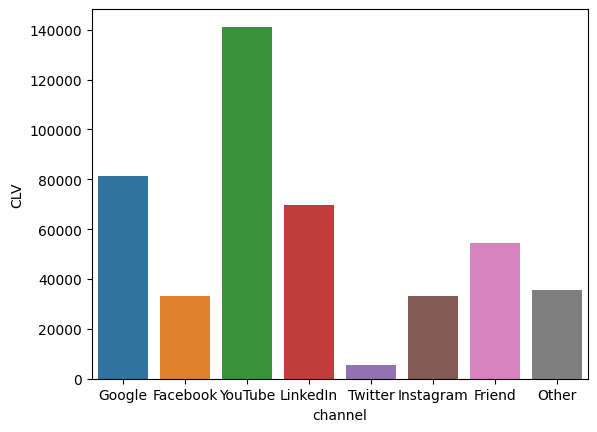

In [8]:
# Revenue by each Channel
sns.barplot( x=data.groupby('channel')['CLV'].sum().index,y=data.groupby('channel')['CLV'].sum())
plt.xticks(ticks=range(0,8), labels=['Google',
'Facebook',
'YouTube',
'LinkedIn',
'Twitter',
'Instagram',
'Friend',
'Other']);
#sns.barplot(data=data, x='region', y='CLV')

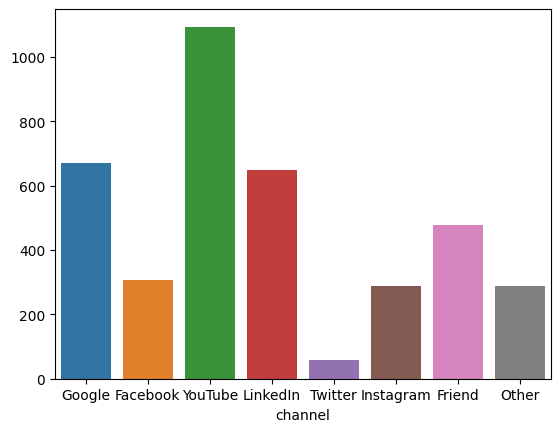

In [9]:
sns.barplot( x=data.groupby('channel').size().index,y=data.groupby('channel').size())
plt.xticks(ticks=range(0,8), labels=['Google',
'Facebook',
'YouTube',
'LinkedIn',
'Twitter',
'Instagram',
'Friend',
'Other']);

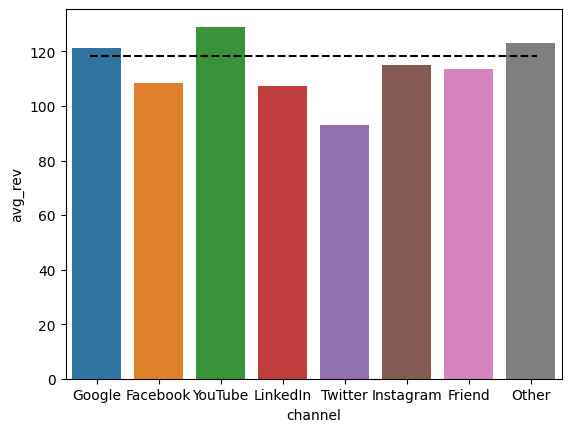

In [10]:
revenue_analysis_by_channel= data.groupby('channel')['CLV'].agg(['sum', 'count', 'mean'])
revenue_analysis_by_channel['avg_rev']=revenue_analysis_by_channel['sum']/revenue_analysis_by_channel['count']
sns.barplot(y=revenue_analysis_by_channel.avg_rev, x=revenue_analysis_by_channel.index)
plt.axhline(y=data['CLV'].mean(),xmin=0.05, xmax=.95 , color='black', linestyle='--')

plt.xticks(ticks=range(0,8), labels=['Google',
'Facebook',
'YouTube',
'LinkedIn',
'Twitter',
'Instagram',
'Friend',
'Other']);

### Inference:
Based on their Average revenue, all channels contribute equally to the overall CLV. Only Google and Youtube surpass the average Revenue.

Youtube, Google and LinkedIn garner the maximum revenues and the count of subscribers from each channel are proportional. 


### Channel Popularity:

''

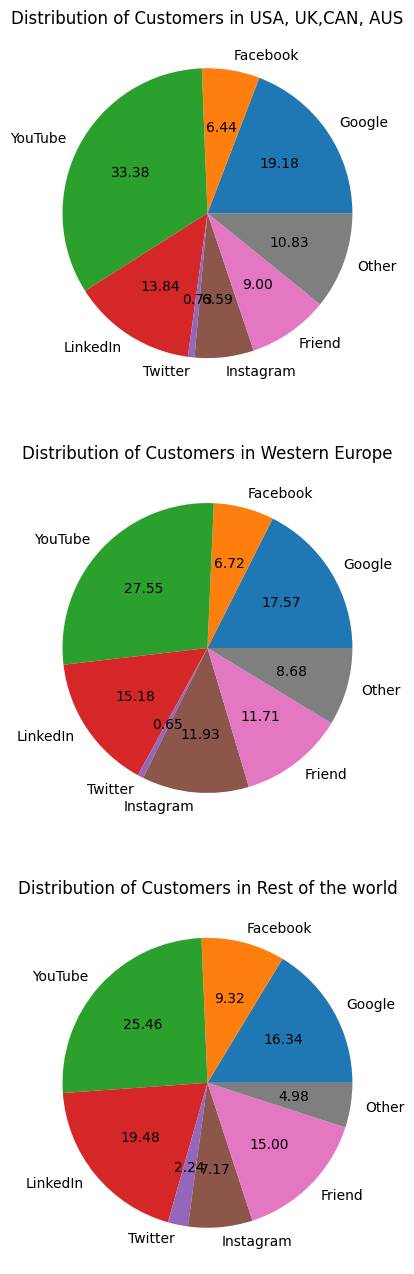

In [11]:
# data.groupby('channel')
plt.figure(figsize=(15,16))
plt.subplot(3,1,1)
plt.pie(data[data['region']==0].groupby('channel').size(), autopct='%.2f', labels=['Google',
'Facebook',
'YouTube',
'LinkedIn',
'Twitter',
'Instagram',
'Friend',
'Other'])
plt.title('Distribution of Customers in USA, UK,CAN, AUS')

plt.subplot(3,1,2)
plt.pie(data[data['region']==1].groupby('channel').size(), autopct='%.2f', labels=['Google',
'Facebook',
'YouTube',
'LinkedIn',
'Twitter',
'Instagram',
'Friend',
'Other'])
plt.title('Distribution of Customers in Western Europe')

plt.subplot(3,1,3)
plt.pie(data[data['region']==2].groupby('channel').size(), autopct='%.2f', labels=['Google',
'Facebook',
'YouTube',
'LinkedIn',
'Twitter',
'Instagram',
'Friend',
'Other'])
plt.title('Distribution of Customers in Rest of the world')
;

Consistently, Youtube, Google and LinkedIn seem to be the best channels for promotion.

### Watch-time analysis

*Handling the missing values:*
minutes_watched is the only column with missing values. Most likely, these null values correspond to people who've entered the program, but have not seen any content. That's why we will impute the missing values with 0 instead of removing the rows from the dataset. 


In [12]:
data['minutes_watched'].fillna(0, inplace=True)

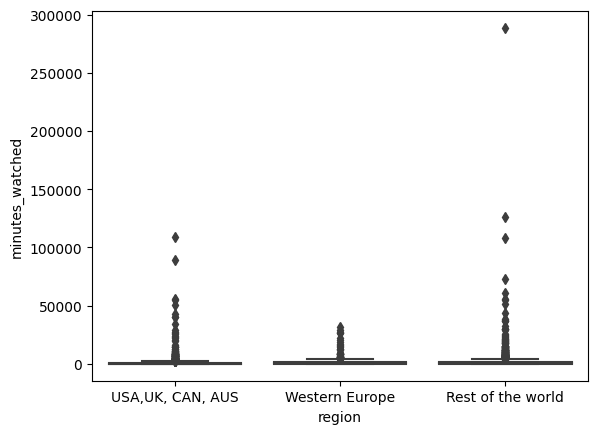

In [13]:
sns.boxplot(y=data['minutes_watched'], x=data.region)
plt.xticks(ticks=[0,1,2], labels=['USA,UK, CAN, AUS', 'Western Europe', 'Rest of the world']);

In [14]:
#Since the data is highly skewed and non-sensical, filter out the data at the mean to get a beter understanding of the real distribution
data['minutes_watched'].mean()

1916.0281690140846

In [15]:
data[data['minutes_watched']>2000]

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
6,5456.0,245.17,0,1
12,5915.0,366.45,1,1
15,28988.0,253.93,2,8
17,9158.0,53.94,0,1
...,...,...,...,...
3554,2424.0,91.50,2,3
3555,6445.0,19.00,2,1
3556,2747.0,121.00,2,1
3594,11072.0,159.00,0,3


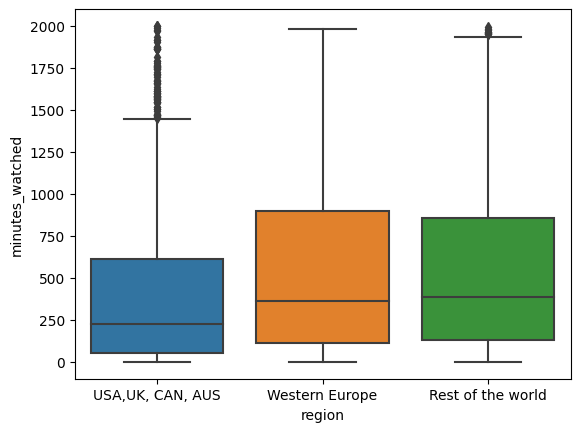

In [16]:
sns.boxplot(y=data[data['minutes_watched']<2000]['minutes_watched'], x=data.region)
plt.xticks(ticks=[0,1,2], labels=['USA,UK, CAN, AUS', 'Western Europe', 'Rest of the world']);

In [17]:
 np.random.randint(1, 5, size=45)

array([1, 3, 1, 2, 4, 2, 2, 4, 1, 3, 4, 2, 3, 2, 1, 2, 4, 2, 3, 4, 1, 4,
       4, 2, 3, 3, 2, 1, 1, 2, 1, 1, 4, 2, 3, 3, 4, 3, 4, 2, 2, 3, 2, 1,
       2])

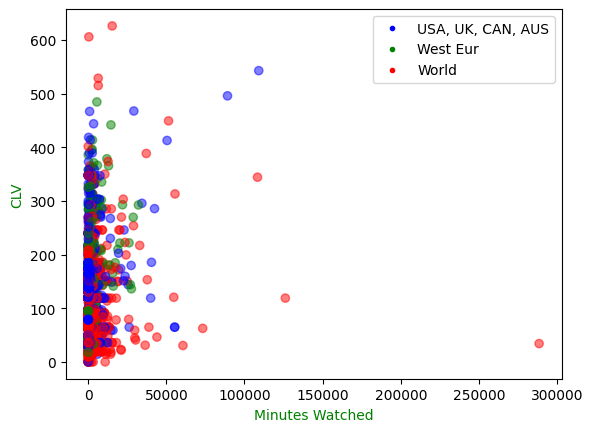

In [18]:
from matplotlib.lines import Line2D

colors={0:'blue', 1:'green', 2:'red'}
scatter=plt.scatter(data['minutes_watched'], data['CLV'], c=data['region'].map(colors), alpha=0.5)

custom = [Line2D([], [], marker='.', color='blue', linestyle='None'),
          Line2D([], [], marker='.', color='green', linestyle='None'),
          Line2D([], [], marker='.', color='red', linestyle='None')]

plt.legend(handles=custom, labels=[ 'USA, UK, CAN, AUS','West Eur', 'World'], loc= "upper right")

plt.xlabel("Minutes Watched", fontsize = 10, c = "green")
plt.ylabel("CLV", fontsize = 10, c = "green")
plt.show()

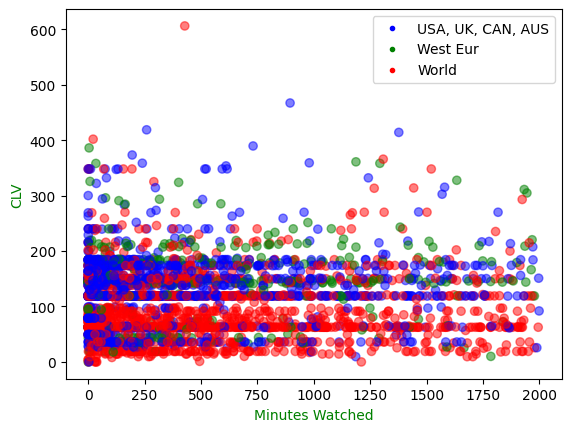

In [19]:
#Trimming the data
colors={0:'blue', 1:'green', 2:'red'}
trimmed_data=data[data['minutes_watched']<2000]
scatter=plt.scatter(trimmed_data['minutes_watched'], trimmed_data['CLV'], c=trimmed_data['region'].map(colors), alpha=0.5)

custom = [Line2D([], [], marker='.', color='blue', linestyle='None'),
          Line2D([], [], marker='.', color='green', linestyle='None'),
          Line2D([], [], marker='.', color='red', linestyle='None')]

plt.legend(handles=custom, labels=[ 'USA, UK, CAN, AUS','West Eur', 'World'], loc= "upper right")

plt.xlabel("Minutes Watched", fontsize = 10, c = "green")
plt.ylabel("CLV", fontsize = 10, c = "green")
plt.show()

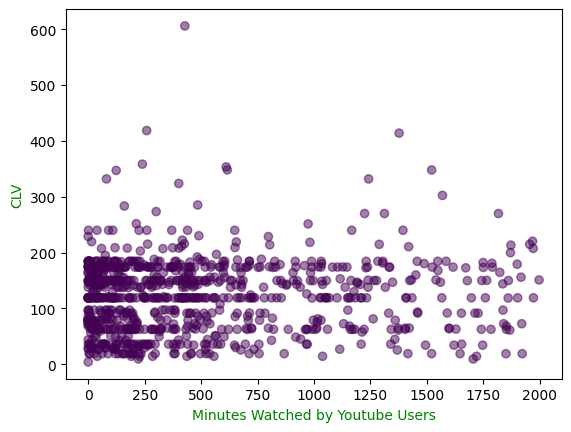

In [20]:
trimmed_data=data[data['minutes_watched']<2000]
trimmed_data=trimmed_data[trimmed_data['channel']==3]
scatter=plt.scatter(trimmed_data['minutes_watched'], trimmed_data['CLV'], 
                    c=trimmed_data['channel'], alpha=0.5)

plt.xlabel("Minutes Watched by Youtube Users", fontsize = 10, c = "green")
plt.ylabel("CLV", fontsize = 10, c = "green")
plt.show()

<Axes: >

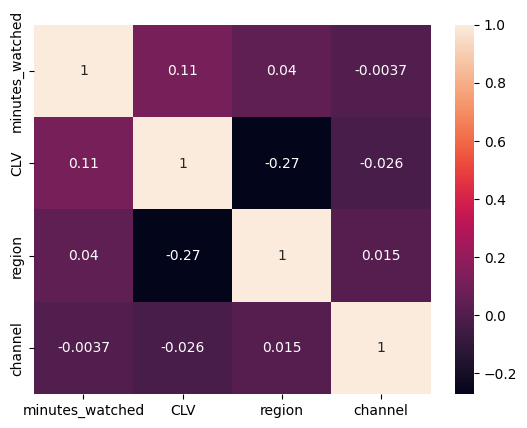

In [21]:
corr=data.corr()
sns.heatmap(corr, annot=True)

There are no highly correlated variables in the dataset

### Clustering Models

Implement two clustering techniques: K-means and Hierarchical Clustering. You should specify the necessary parameters for these algorithms. Use appropriate methods to determine the optimal number of clusters, like the Elbow Method for k-means. Follow these steps:

Before you begin, you must standardize the data to perform the clustering accurately. You can use the standard scaler to fit and transform the data.
Once you’ve standardized the data, you can implement the hierarchical clustering algorithm by Ward’s method.
Next, you must perform k-means segmentation. Here, you won’t be able to predetermine the correct number of clusters, so you must explore varying clusters and use the elbow method to determine the best possible solution.
Finally, determine the best possible number of clusters. If there are inconsistencies between the two methods regarding the optimal number, you must opt for the results of hierarchical clustering. But, you’ll ultimately perform k-means, with the number of clusters predetermined through the hierarchical clustering.


In [22]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scaled_data=pd.DataFrame(scale.fit_transform(data), columns=data.columns)

In [23]:
from sklearn.cluster import KMeans,AgglomerativeClustering

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.1

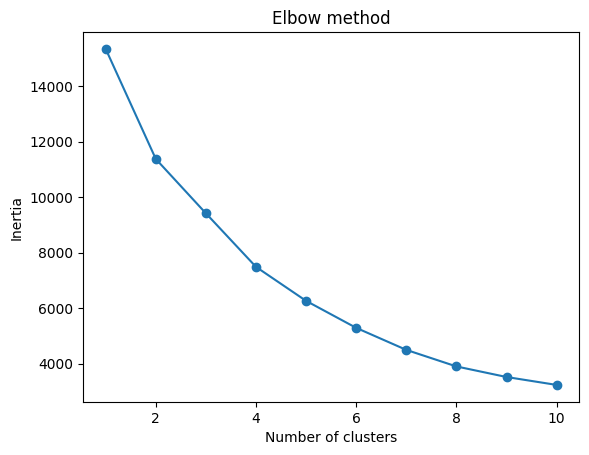

In [24]:
## Finding the best number of clusters using Elbow Method
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [44]:
#Selecting 7 as the point where the curve bends
kmeans_ = KMeans(n_clusters=7)
kmeans_.fit(scaled_data)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=7)

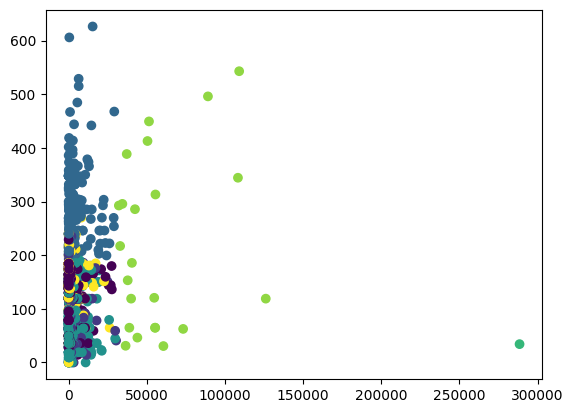

In [45]:
plt.scatter(data.minutes_watched, data['CLV'], c=kmeans_.labels_)
plt.show()

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_data = linkage(scaled_data, method='ward', metric='euclidean')

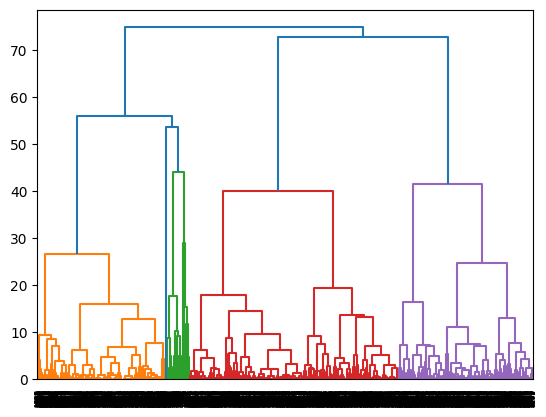

In [28]:
dendrogram(linkage_data)
plt.show()

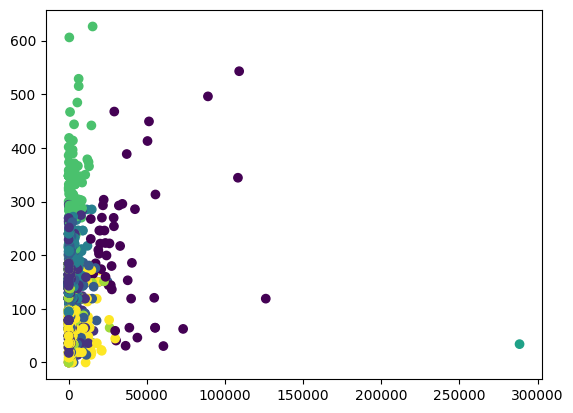

In [46]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=8, metric='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(scaled_data)

plt.scatter(data.minutes_watched, data['CLV'], c=labels)
plt.show()

Using the hierarchical clustering results, we can select 8 as the ideal number of clusters. Rerunning the Kmeans data and identifying the clusters

In [49]:
# running KMeans with the optimal cluster number
kmeans_ = KMeans(n_clusters=8)
kmeans_.fit(scaled_data)
data['cluster_labels']=kmeans_.labels_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [52]:
results_1=pd.merge(
         data.groupby('cluster_labels')[['CLV', 'minutes_watched']].agg('mean', 'count'),
         pd.Series(data.groupby('cluster_labels').size(), name='Count'), 
         how='left', 
         on=data.groupby('cluster_labels')[['CLV', 'minutes_watched']].agg('mean', 'count').index
        )
results_1.drop(columns='key_0') #.sort_values(by='CLV', ascending=False)

,CLV,minutes_watched,Count
0,57.016216,1457.641081,925
1,153.296101,1579.688098,731
2,34.200000,288508.000000,1
3,134.181818,1167.396104,462
4,125.379085,1062.826695,929
5,314.407661,4623.947368,171
6,87.358057,1572.766892,592
7,221.802174,56782.521739,23


## Cluster Classification & Recommendations:


**Cluster 0 & 6- "Explorers"**

- Low CLV
- High minutes watched
- High count

Recommendation: Implement strategies to increase CLV, perhaps through targeted promotions or content recommendations.

**Cluster 1- "Regular-I Viewers"**

- Moderate CLV
- Moderate minutes watched
- High count

Recommendation: Encourage content exploration and provide recommendations to increase the time spent watching.


**Cluster 2 - "Bad User"**

- Very low CLV
- Very High watched
- Extremely low count

Recommendation: This would be a bucket that utilises offers and free resources the most, since their count is negligible we can consider it as an outlier.


**Cluster 3- "Regular-II Viewers"**

- Moderate CLV
- Moderate minutes watched
- Moderate count

Recommendation: Encourage content exploration and provide recommendations to increase the time spent watching.


**Cluster 4 - "Casual Users"**

- Moderate CLV
- Less minutes watched
- High count

Recommendation: Focus on increasing engagement through personalized content suggestions and targeted marketing.


**Cluster 5 - "High-Value Users"**

- Very high CLV
- High watched
- Moderate count

Recommendation: Acknowledge and reward loyalty with exclusive content or premium features to enhance their experience. Focus would be to increase Cluster 5.


**Cluster 7 - "Premium Users"**

- High CLV
- Very High watched
- Low count

Recommendation: Focus on increasing engagement through personalized content suggestions and targeted marketing. Reward loyalty with exclusive content


In [53]:
cluster_mapping= {0: 'Explorers',
                 1:'Regular',
                  2:'Bad',
                 3:'Regular',
                  4:'Casual',
                   5:'High-Value',
                   6:'Explorers',
                 7:'Premium',
                 }

In [59]:
data['clusters']=data['cluster_labels'].map(cluster_mapping)

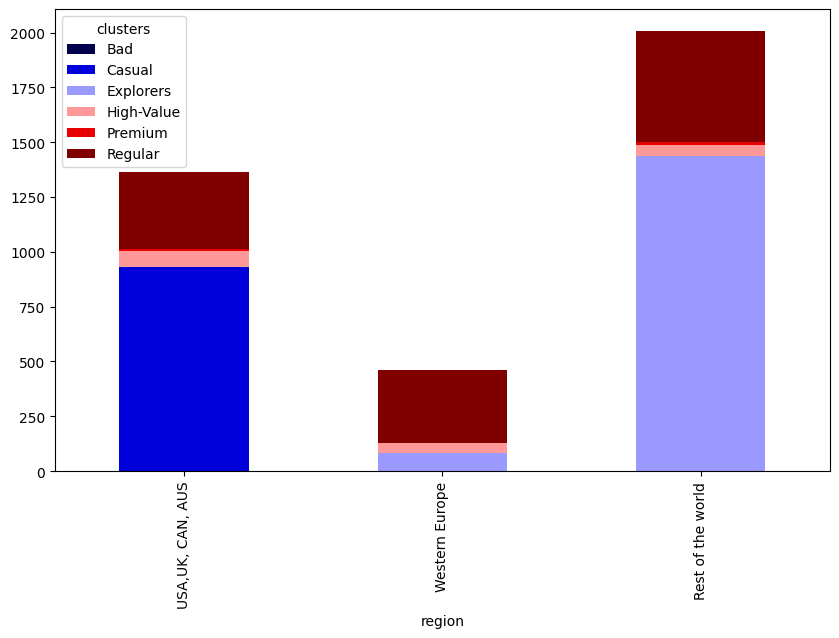

In [69]:
pivot_count=(data.pivot_table(index='region', columns='clusters', values='CLV' , aggfunc='count',fill_value=0))
pivot_count.plot(kind='bar', stacked=True, colormap='seismic', figsize=(10, 6))
plt.xticks(ticks=[0,1,2], labels=['USA,UK, CAN, AUS', 'Western Europe', 'Rest of the world']);

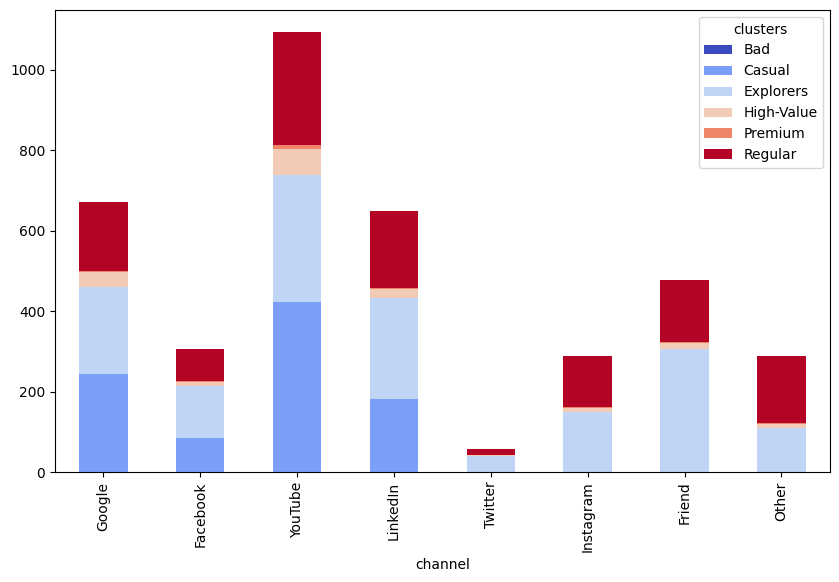

In [70]:
pivot_count_channel=(data.pivot_table(index='channel', columns='clusters', values='CLV' , aggfunc='count',fill_value=0))
pivot_count_channel.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.xticks(ticks=range(0,8), labels=['Google','Facebook','YouTube', 'LinkedIn', 'Twitter', 'Instagram','Friend', 'Other']);

In [71]:
region_mapping={0:'USA,UK, CAN, AUS', 1:'Western Europe', 2:'Rest of the world'}
channel_mapping={1:'Google',2:'Facebook',3:'YouTube', 4:'LinkedIn',5:'Twitter',6: 'Instagram',7:'Friend',8: 'Other'}
data['region_names']=data['region'].map(region_mapping)
data['channel_names']=data['channel'].map(channel_mapping)

In [72]:
#RESULTS 1
data.groupby(['region_names', 'clusters'])[['CLV', 'minutes_watched']].agg(['mean', 'count'] )                                  

CLV       minutes_watched      
                                    mean count            mean count
region_names      clusters                                          
Rest of the world Bad          34.200000     1   288508.000000     1
                  Explorers    69.940279  1436     1528.403900  1436
                  High-Value  324.285714    49     5910.877551    49
                  Premium     180.085385    13    58248.769231    13
                  Regular     148.936870   508     1682.667323   508
USA,UK, CAN, AUS  Casual      125.379085   929     1062.826695   929
                  High-Value  308.377838    74     3175.391892    74
                  Premium     274.193333     9    57403.666667     9
                  Regular     126.711723   354     1078.209040   354
Western Europe    Explorers    49.650988    81     1044.543210    81
                  High-Value  313.619792    48     5543.395833    48
                  Premium     292.600000     1    32131.000000     1
                  Regular     161.738882   331     1382.501511   331

In [73]:
#RESULTS 2
data.groupby(['channel_names', 'clusters'])[['CLV', 'minutes_watched']].agg(['mean', 'count'] )                                  

CLV       minutes_watched      
                                mean count            mean count
channel_names clusters                                          
Facebook      Bad          34.200000     1   288508.000000     1
              Casual      127.382651    83      786.012048    83
              Explorers    55.430930   129     1657.689922   129
              High-Value  319.555455    11     2841.454545    11
              Premium      38.480000     2    52300.000000     2
              Regular     147.225625    80     1793.175000    80
Friend        Explorers    89.571311   305     1665.865574   305
              High-Value  318.544667    15     7014.266667    15
              Premium     248.860000     3    61666.333333     3
              Regular     138.597613   155     1036.496774   155
Google        Casual      123.679959   243     1183.497942   243
              Explorers    55.859954   218     1524.403670   218
              High-Value  328.866857    35     3868.657143    35
              Premium     257.793333     3    46705.666667     3
              Regular     155.692035   172     1856.517442   172
Instagram     Explorers    80.758658   149     1132.865772   149
              High-Value  284.961818    11     2737.636364    11
              Premium     217.180000     1    32947.000000     1
              Regular     139.861719   128     1122.257812   128
LinkedIn      Casual      117.520939   181     1083.895028   181
              Explorers    58.258254   252     1455.126984   252
              High-Value  289.132727    22     4894.318182    22
              Premium      63.690000     2    56051.500000     2
              Regular     141.704611   193     1297.616580   193
Other         Explorers    94.357706   109     2105.045872   109
              High-Value  323.154545    11     8450.090909    11
              Premium     543.020000     1   109109.000000     1
              Regular     126.323353   167     1406.862275   167
Twitter       Explorers    60.388205    39     1060.871795    39
              High-Value  335.385000     2      596.500000     2
              Regular     139.816471    17      857.764706    17
YouTube       Casual      129.333863   422     1038.748815   422
              Explorers    58.400032   316     1325.417722   316
              High-Value  316.236250    64     4482.640625    64
              Premium     237.904545    11    56556.636364    11
              Regular     161.165730   281     1519.715302   281

In [74]:
#RESULTS 3
data.groupby(['channel_names', 'region_names', 'clusters'])[['CLV', 'minutes_watched']].agg(['mean', 'count'] )                                  

CLV       minutes_watched   
                                                  mean count            mean   
channel_names region_names      clusters                                       
Facebook      Rest of the world Bad          34.200000     1   288508.000000  \
                                Explorers    56.026475   122     1689.475410   
                                High-Value  300.985000     2     1945.500000   
                                Premium      38.480000     2    52300.000000   
                                Regular     141.403500    60     1984.583333   
...                                                ...   ...             ...   
YouTube       USA,UK, CAN, AUS  Premium     202.380000     2    41204.000000   
              Western Europe    Explorers    48.647000    20      708.950000   
                                High-Value  313.351176    17     5492.411765   
                                Premium     292.600000     1    32131.000000   
                                Regular     169.202697    89     1279.382022   

                                                  
                                           count  
channel_names region_names      clusters          
Facebook      Rest of the world Bad            1  
                                Explorers    122  
                                High-Value     2  
                                Premium        2  
                                Regular       60  
...                                          ...  
YouTube       USA,UK, CAN, AUS  Premium        2  
              Western Europe    Explorers     20  
                                High-Value    17  
                                Premium        1  
                                Regular       89  

[69 rows x 4 columns]


### New Customer Acquisition recommendations
**Youtube, Google** followed by **LinkedIn** are the best channels to target ads and marketing campaigns. Roughly 50% of the total customer base comes from these three channels, accounting for the majority of CLV. The customer make-up for these channels consist of Explorers, Regulars and Premium users. Customers with high watch time low CLV, i.e. explorers should be targetted with discount ads/ marketing camoaigns to increase their investment in the platform. Regular and premium users should get content recommendation and also perks like access to referral program (our next best acquisition channel).

Number of customers coming in via **Friends** are higher than Instagram or Facebook. It might be beneficial to look into referral programs. A majority of the 'Friends' channel consists of Casual Viewer with moderate watch time and lower CLV, we can look into offering discounts or package deals in a referral program to boost sales.


### Channel Performance:


- X is the worst performer and seems to attract 'Explorers', who have least impact on Revenue. It would be beneficial to not put marketing money into this channel and simnply allow any sort of organic growth.


- Potential for increase in marketing in Facebook and Instagram. 

   </n>  Facebook is an equal mix of Explorers and Premium Users, while Instagram has a a high concentration of Casual Viewers. With better content marketing and ads for fresh content, we can increase user engagement and inturn Revenue.
     </n> Premium users are already good customers and offering fresh content will help keep them on the platform. 
     </n>  For Casual users (i.e. moderate CLV, high watch time), we can assume content recommendations and targetted marketing of discounted content/subscriptions may help. </P>
     </n>  Explorers are customers with low CLV but high watch time, they probably make use of any offers and discounts offered. We should target these customers with new content, add-ons and limited time offers to attract them.


<p>
Further thoughts,:
1. Gain better understanding of the customer segments from a marketing perspective, understanding what each cluster signifies and how it could be targeted with specific marketing strategies. 
2. Conduct an analysis of the acquisition channels and their overall performance.
3. Think about the channels through which customers visited the platform and their regions.Go through the different segments and analyze the different groups of customers. Ask such questions as:

- Are there segments that bring in engaged students with high CLV?
- From which channels do they originate, and from which regions do they come?</p>